In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["location"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [16]:
df = pd.read_csv('owid-covid-data.csv')



In [17]:
europe_rows = df[df['continent'] == 'Europe']
elso_3 = europe_rows[((europe_rows['date'] >= '2020-01-05') & (europe_rows['date'] <= '2020-03-05'))]
europe_rows

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3012,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3013,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3014,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3015,ALB,Europe,Albania,2020-01-08,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3016,ALB,Europe,Albania,2020-01-09,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372904,OWID_WLS,Europe,Wales,2023-07-08,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372905,OWID_WLS,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372906,OWID_WLS,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372907,OWID_WLS,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN


In [19]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

In [154]:
#A kelet-európai régió halálozási adatok (2021-12-12)
#Belarus,Romania,Ukraine,Moldova,Estonia,Georgia,Latvia,Lithuania
start_date='2021-12-11'
end_date='2021-12-11'
europe_df = df[df['continent'] == 'Europe']
europe_locations = europe_df['location'].tolist()
countries = list(set([location.strip().title() for location in europe_locations]))
eastern_europe_countries=['Belarus','Estonia','Georgia','Latvia','Lithuania','Moldova','Romania','Ukraine']
E_Europe=adatcsv(start_date,end_date,eastern_europe_countries,delete_columns=[])
average_deaths = E_Europe['total_deaths'].mean()
teszt=E_Europe[E_Europe['location']=='Lithuania'] 
E_Europe


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30870,BLR,Europe,Belarus,2021-12-11,662056.0,0.0,5147.0,0.0,0.94,NaN,...,46.1,NaN,11.000,74.79,0.823,9534956,NaN,NaN,NaN,NaN
101561,EST,Europe,Estonia,2021-12-11,214996.0,0.0,1738.0,0.0,0.98,NaN,...,39.3,NaN,4.690,78.74,0.892,1326064,NaN,NaN,NaN,NaN
122691,GEO,Asia,Georgia,2021-12-11,865293.0,0.0,12344.0,0.0,0.92,NaN,...,55.5,NaN,2.600,73.77,0.812,3744385,NaN,NaN,NaN,NaN
181482,LVA,Europe,Latvia,2021-12-11,257327.0,0.0,4582.0,0.0,0.96,NaN,...,51.0,NaN,5.570,75.29,0.866,1850654,NaN,NaN,NaN,NaN
190518,LTU,Europe,Lithuania,2021-12-11,483449.0,0.0,6861.0,0.0,0.96,125.0,...,38.0,NaN,6.560,75.93,0.882,2750058,NaN,NaN,NaN,NaN
216994,MDA,Europe,Moldova,2021-12-11,366162.0,0.0,9787.0,0.0,0.89,NaN,...,44.6,86.979,5.800,71.90,0.750,3272993,NaN,NaN,NaN,NaN
277847,ROU,Europe,Romania,2021-12-11,1785120.0,0.0,57021.0,0.0,0.66,NaN,...,37.1,NaN,6.892,76.05,0.828,19659270,NaN,NaN,NaN,NaN
354314,UKR,Europe,Ukraine,2021-12-11,3459680.0,0.0,85957.0,0.0,0.87,NaN,...,47.4,NaN,8.800,72.06,0.779,39701744,NaN,NaN,NaN,NaN


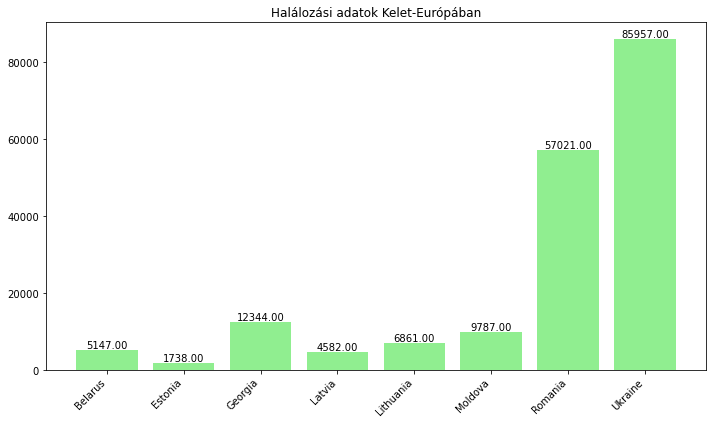

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#y=average_deaths
#x=np.linspace(0,10)
E_Europe['MortalityComparison'] = E_Europe['total_deaths'] 

plt.figure(figsize=(10, 6))
bars = plt.bar(eastern_europe_countries, E_Europe['MortalityComparison'], color='lightgreen')
data={'Countries':['Belarus','Estonia','Georgia','Latvia','Lithuania','Moldova','Romania','Ukraine']}
sample_df = pd.DataFrame(data)
plt.title('Halálozási adatok Kelet-Európában')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


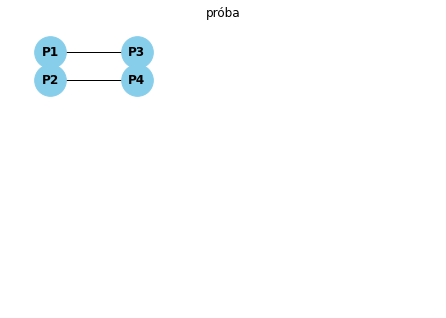

In [143]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_node("P1", pos=(0.1, 0.9))
G.add_node("P2", pos=(0.1, 0.8))
G.add_node("P3", pos=(0.3, 0.9))
G.add_node("P4", pos=(0.3, 0.8))

G.add_edge("P1", "P2")
G.add_edge("P1", "P3")
G.add_edge("P3", "P4")
G.add_edge("P2", "P4")

node_positions = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(6, 4))
nx.draw(G, pos=node_positions, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight='bold')
plt.xlim(0, 1)  
plt.ylim(0, 1)  
plt.title("próba")

plt.show()


In [262]:
#mukodik de bena
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import BoxZoomTool, Circle, HoverTool, MultiLine, Plot, Range1d, ResetTool, TapTool, BoxSelectTool
from bokeh.plotting import from_networkx

G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'A3', 'A4', 'B1','B2','B3','B4','C1','C2','C3','C4','D1','D2','D3','D4','E1','E2','E3','E4','E5','E6',
                  'E7','E8','E9','E10','P1'])
node_positions = {'A1': (0.1, 0.9), 'A2': (0.1, 0.8), 'A3': (0.3, 0.9), 'A4': (0.3, 0.8), 
                  'B1':(0.5,0.9),'B2':(0.5,0.8),'B3':(0.7,0.9),'B4':(0.7,0.8), 
                  'C1':(0.1,0.6),'C2': (0.1, 0.5), 'C3': (0.3, 0.6), 'C4': (0.3, 0.5),
                  'D1':(0.5,0.6),'D2':(0.7,0.6),'D3':(0.5,0.5),'D4':(0.7,0.5),
                  'E1':(0.9,0.9),'E2':(1.1,0.9),'E3':(0.9,0.8),'E4':(1.1,0.8),
                  'E5':(0.9,0.6),'E6':(1.1,0.6),'E7':(0.9,0.5),'E8':(1.1,0.5),'E9':(0.9,0.7),'E10':(1.1,0.7),'P1':(0.6,0.7)}

G.add_edges_from([('A1', 'A2'), ('A2', 'A4'), ('A3', 'A4'), ('A3', 'A1'),('A2','A3'),('A1','A4'),
                  ('B1','B2'),('B2','B4'),('B3','B4'),('B3','B1'),('B2','B3'),('B4','B1'),
                  ('C1', 'C2'), ('C2', 'C4'), ('C3', 'C4'), ('C3', 'C1'),('C1','C4'),('C2','C3'),
                  ('D1', 'D2'), ('D2', 'D4'), ('D3', 'D4'), ('D3', 'D1'),('D4','D1'),('D2','D3'),
                  ('E1', 'E2'), ('E2', 'E4'), ('E3', 'E4'), ('E3', 'E1'),('E1','E4'),('E2','E3'),
                  ('E5', 'E6'), ('E6', 'E8'), ('E7', 'E8'), ('E7', 'E5'),('E5','E8'),('E6','E7'),
                  ('E10','E3'),('E9','E4'),
                  ('E9','E10'),('E9','E5'),('E3','E9'),('E6','E10'),('E10','E4'),('E9','E6'),('E10','E5'),
                  ('B3','E1'),('B4','E3'),('D2','E5'),('D4','E7')])
for node in G.nodes:
    if node != 'P1':
        G.add_edge('P1', node)
nx.set_node_attributes(G, node_positions, 'pos')
plot = Plot(width=400, height=400, x_range=Range1d(-1, 3), y_range=Range1d(-2, 2))
plot.add_tools(BoxZoomTool(), TapTool(),ResetTool(),BoxSelectTool() )

graph_renderer = from_networkx(G, nx.get_node_attributes(G, 'pos'))
graph_renderer.edge_renderer.glyph = MultiLine(line_color='lightgrey', line_alpha=0.8, line_width=5)

graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color="red", line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color="red", line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="blue")

plot.renderers.append(graph_renderer)


output_file("Modellezes.html")
show(plot)
